# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

In [2]:
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

In [9]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
   
    # Create endpoint URL with each city
    units = "metric"
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | simian
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | dabakala
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | suai
City not found. Skipping...
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | masuguru
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | st. john's
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | souk ahras
Processing Record 20 of Set 1 | quincy
Processing Record 21 of Set 1 | gadzhiyevo
Processing Record 22 of Set 1 | buta


In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [13]:
print(f"{record_count}")

42


In [15]:
print(city_data_df)

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        thompson  55.7435  -97.8558    -20.91        77         100   
1          simian  44.6142   22.7072      6.62        58          99   
2         talnakh  69.4865   88.3972    -21.00        97         100   
3    puerto ayora  -0.7393  -90.3518     25.31        94          83   
4        dabakala   8.3667   -4.4333     25.55        68          57   
..            ...      ...       ...       ...       ...         ...   
562     shubarshi  48.5872   57.1869      1.95        96         100   
563    siwa oasis  29.2041   25.5195     12.50        31           0   
564   san antonio  29.4241  -98.4936     11.25        71           0   
565      tyul'gan  52.3405   56.1660     -9.94        97          99   
566    luganville -15.5333  167.1667     28.97        76          88   

     Wind Speed Country        Date  
0          2.57      CA  1704605028  
1          2.66      RO  1704605028  
2          4.48      

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-20.91,77,100,2.57,CA,1704605028
1,simian,44.6142,22.7072,6.62,58,99,2.66,RO,1704605028
2,talnakh,69.4865,88.3972,-21.00,97,100,4.48,RU,1704605029
3,puerto ayora,-0.7393,-90.3518,25.31,94,83,0.89,EC,1704605029
4,dabakala,8.3667,-4.4333,25.55,68,57,2.17,CI,1704605030


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_challenge/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data_challenge/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-20.91,77,100,2.57,CA,1704605028
1,simian,44.6142,22.7072,6.62,58,99,2.66,RO,1704605028
2,talnakh,69.4865,88.3972,-21.00,97,100,4.48,RU,1704605029
3,puerto ayora,-0.7393,-90.3518,25.31,94,83,0.89,EC,1704605029
4,dabakala,8.3667,-4.4333,25.55,68,57,2.17,CI,1704605030


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

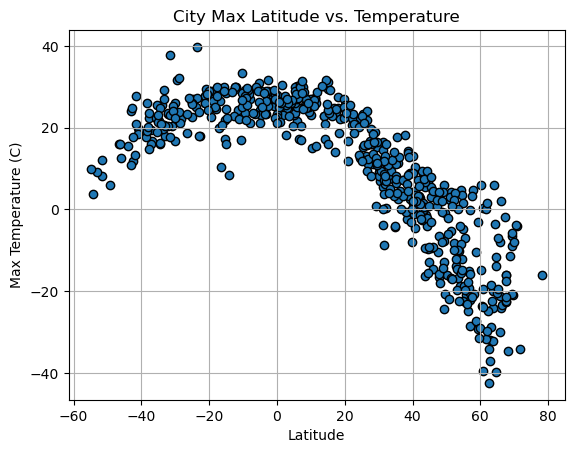

In [23]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data_challenge/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

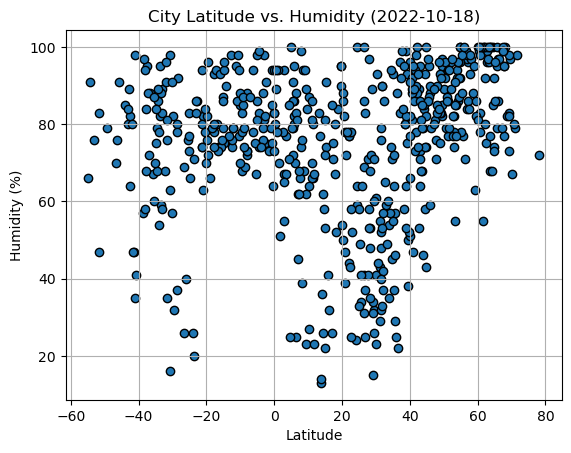

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data_challenge/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

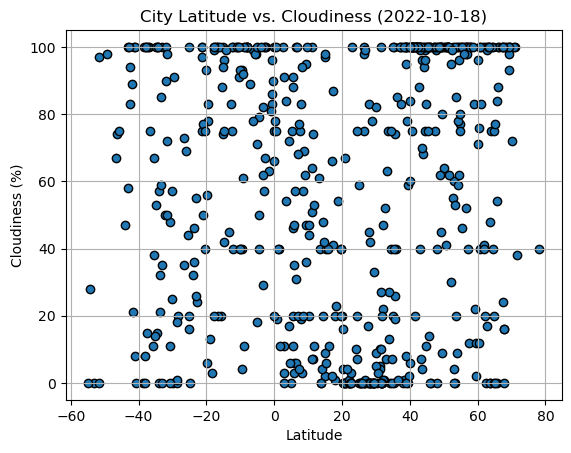

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data_challenge/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

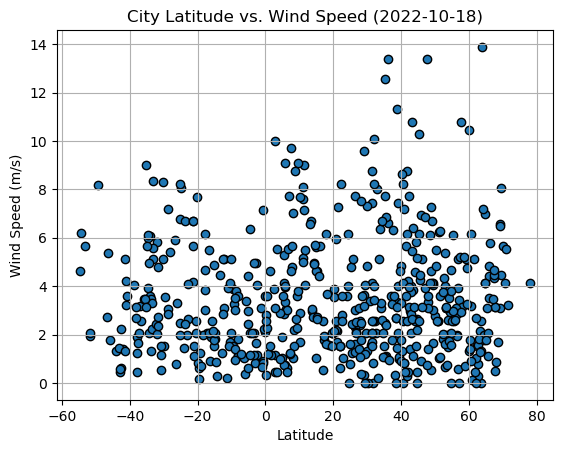

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data_challenge/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-20.91,77,100,2.57,CA,1704605028
1,simian,44.6142,22.7072,6.62,58,99,2.66,RO,1704605028
2,talnakh,69.4865,88.3972,-21.00,97,100,4.48,RU,1704605029
4,dabakala,8.3667,-4.4333,25.55,68,57,2.17,CI,1704605030
6,hamilton,39.1834,-84.5333,2.47,93,100,2.06,US,1704605030


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto ayora,-0.7393,-90.3518,25.31,94,83,0.89,EC,1704605029
5,margaret river,-33.9500,115.0667,25.66,54,57,6.06,AU,1704604791
10,masuguru,-11.3667,38.4167,24.26,95,100,0.19,TZ,1704605032
14,adamstown,-25.0660,-130.1015,22.63,73,100,6.76,PN,1704605034
15,kavieng,-2.5744,150.7967,29.03,75,67,4.05,PG,1704605034


###  Temperature vs. Latitude Linear Regression Plot

y = -0.79x +33.43
The r-value is: 0.7827051116315162


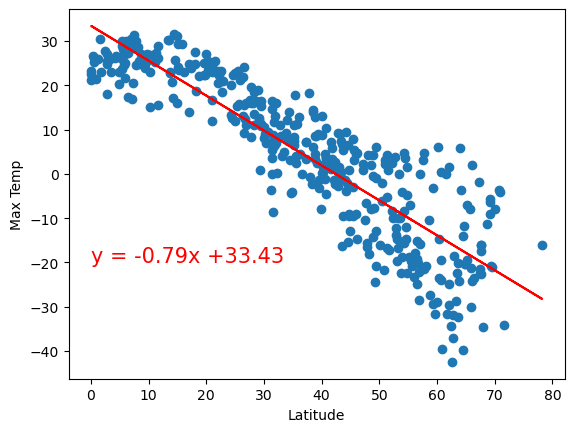

In [66]:
# Linear regression on Northern Hemisphere


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Get regression values
regress_values_1 = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],regress_values_1,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.24x +28.92
The r-value is: 0.3355999922918681


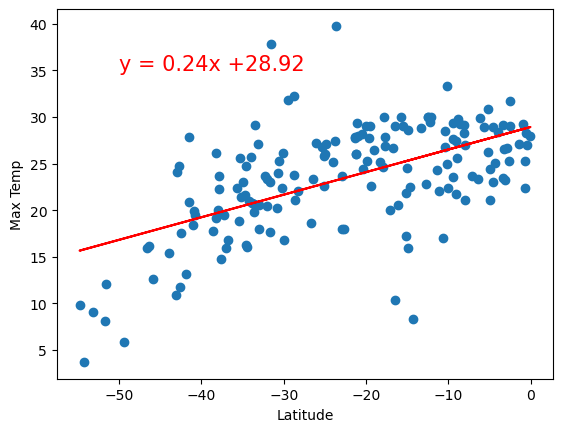

In [70]:
# Linear regression on Southern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Get regression values
regress_values_2 = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],regress_values_2,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

As latitude increases in the Northern Hemisphere, the temperature tends to decrease. The negative slope of -0.79 suggests a negative correlation between latitude and temperature. The r-value of 0.78 indicates a relatively strong positive correlation, suggesting that the model captures a substantial portion of the variance in temperature. 

On the other hand, in the Southern Hemisphere, as latitude increases, the temperature tends to increase with the positive slope of 0.24 indicating a positive correlation. However, this is a weaker correlation as suggested by the r-value of 0.34.

The contrasting slopes in the Northern and Southern Hemispheres show the hemispheric differences in temperature patterns.

### Humidity vs. Latitude Linear Regression Plot

y = 0.43x +58.82
The r-value is: 0.15310438128803394


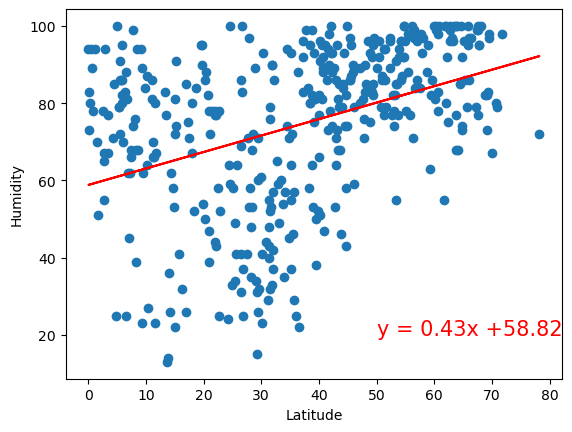

In [61]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Get regression values
regress_values_3 = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],regress_values_3,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.24x +82.21
The r-value is: 0.04561551523985344


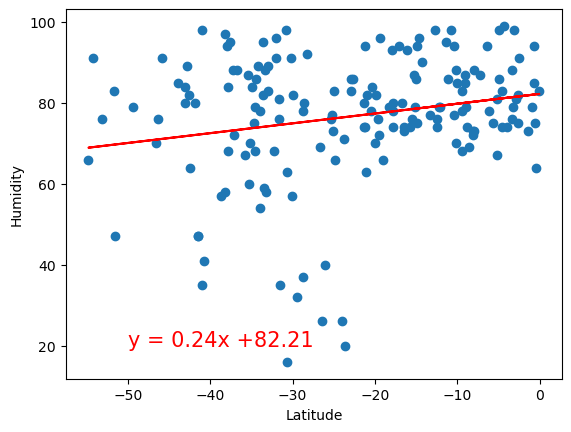

In [59]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Get regression values
regress_values_4 = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],regress_values_4,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 


In the Northern Hemisphere, as latitude increases, there is a slight increase in humidity. The positive slope of 0.43 suggests a positive correlation between latitude and humidity. In the Southern Hemisphere, there is a small increase in humidity as latitude increases. It also comes with a positive correlation due to having a positive slope of 0.24.

In both parts, the very low r-values indicate a weak correlation. The model may not be very effective in predicting humidity based on latitude in both hemispheres. Given the weak correlations, we could consider exploring non-linear regression models or other statistical techniques to better capture humidity patterns.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.69x +29.17
The r-value is: 0.10785106747492479


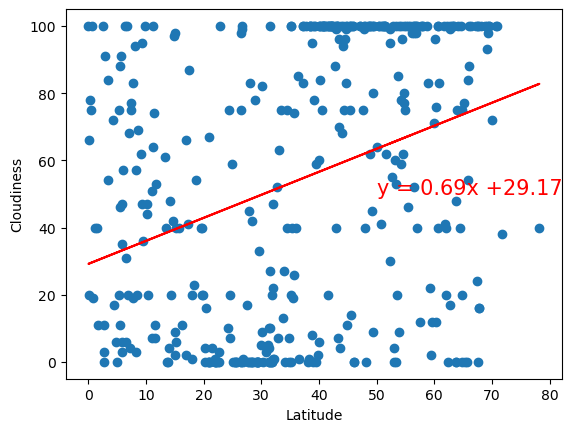

In [57]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Get regression values
regress_values_5 = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],regress_values_5,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.7x +79.45
The r-value is: 0.07693813675699022


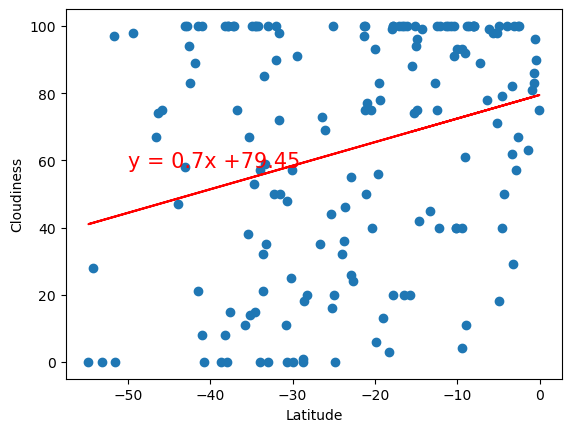

In [55]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Get regression values
regress_values_6 = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],regress_values_6,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,58),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

In both hemispheres, as latitude increases, there is a slight increase in cloudiness. The positive slopes suggest a positive correlation between latitude and cloudiness. This is however not a strong relationship due to having very low r-values. The linear regression models may not effectively capture the variability in cloudiness based on latitude. As a result, we could consider exploring non-linear regression models or other statistical techniques to better model cloudiness trends.

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.0x +3.58
The r-value is: 0.00012387336706959514


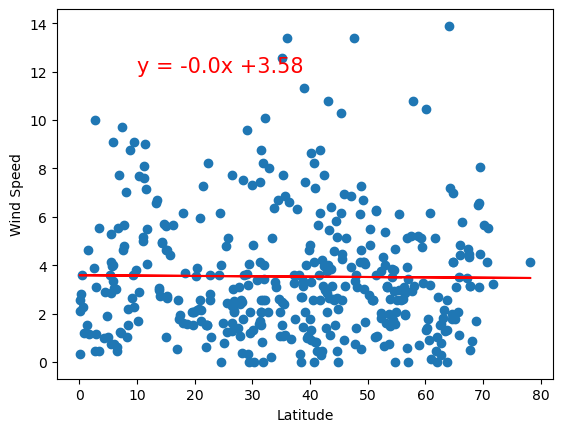

In [53]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Get regression values
regress_values_7 = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],regress_values_7,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.03x +2.54
The r-value is: 0.0325468031057772


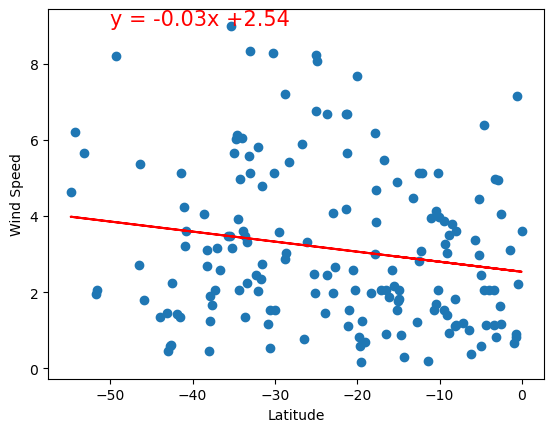

In [51]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Get regression values
regress_values_8 = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],regress_values_8,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,9),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

In both hemispheres, there is an extremely weak negative relationship between latitude and wind speed. The slopes close to zero in both cases suggest almost no change in wind speed as latitude increases. The extremely low r-values indicate essentially no correlation. The linear model is ineffective in predicting wind speed based on latitude. 

Given this lack of correlation, we could consider non-linear regression models or other modeling approaches to capture more complex relationships between location and wind speed.